In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [101]:
#Primero se cargan los datos
nombre_archivo = "T200-Public-Performance-Data-10-20V-September-2019.xlsx"
voltaje = "20"
datos = pd.read_excel(r'./' + nombre_archivo, sheet_name = voltaje + " V")

In [102]:
#Aqui se obtienen los datos del ancho de pulso del PWM (x) y los datos del empuje 
#para cada uno de estos anchos de pulso (y)
columna_PWM = datos.columns[0]
columna_empuje = datos.columns[5]
x = datos[columnaPWM].to_numpy()
y = datos[columna_empuje].to_numpy()

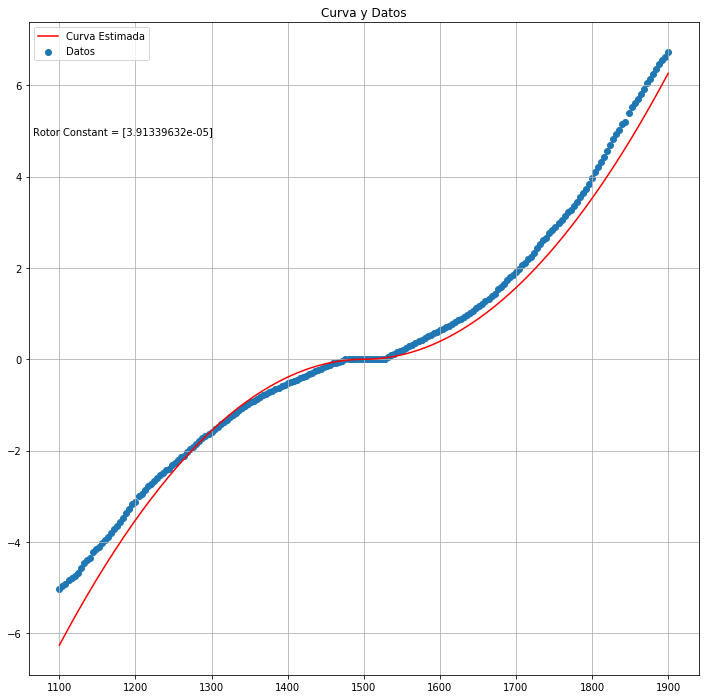

In [103]:
#Aqui se define la funcion para modelar la curva del motor
valor_medio = 1500
def func(x, rotor_constant):
    return rotor_constant*(x-valor_medio)*abs(x-valor_medio)

#Aqui se calcula el parametro rotor_constant
rotor_constant_opt, varianza = curve_fit(func, x, y)
y_pred = func(x, rotor_constant_opt)

#Aqui se grafican los datos y la curva que mejor se ajusta a los datos
fig = plt.figure(1, figsize = (12,12));

fig.text(0.13,0.75,"Rotor Constant = " + str(rotor_constant_opt))
plt.scatter(x, y, label = "Datos");
plt.plot(x, y_pred, label = "Curva Estimada", color = 'r');
plt.title("Curva y Datos")
plt.grid()
plt.legend()
plt.show()

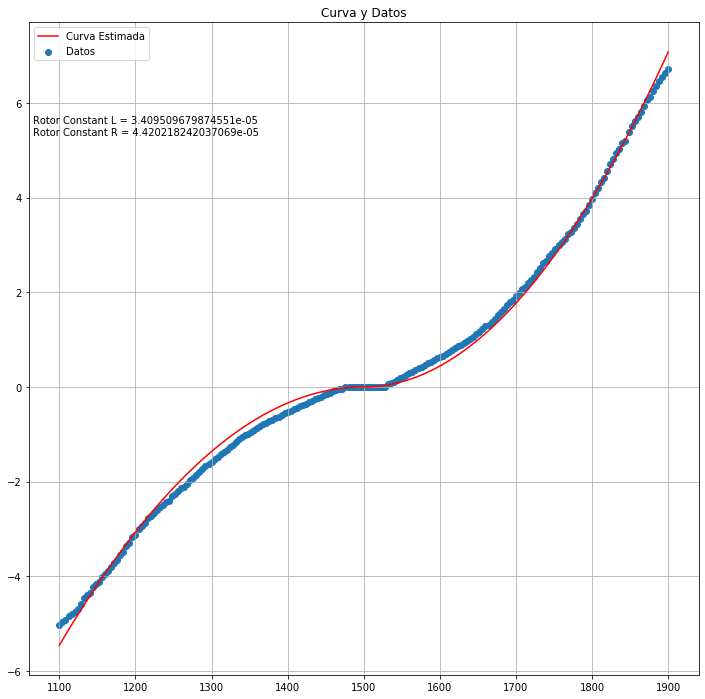

In [104]:
#Aqui se define la funcion para modelar la curva del motor
valor_medio = 1500
deltaL = -40 
deltaR = 36

def func(x, rotor_constant_L, rotor_constant_R):
    Z = (x-valor_medio)*abs(x-valor_medio)
    empuje = np.zeros(Z.shape)
    
    for i in range(0,len(Z)):
        z = Z[i]
        if z <= deltaL:
            e = rotor_constant_L * (z-deltaL)
        elif z >= deltaR:
            e = rotor_constant_R*(z-deltaR)
        else:
            e = 0
            
        empuje[i] = e
        
    return empuje

#Aqui se calculan los parametros optimos de la funcion (rotor_constant_R_opt y rotor_constant_L_opt)
v_opt, varianza = curve_fit(func, x, y)

rotor_constant_L_opt = v_opt[0] 
rotor_constant_R_opt = v_opt[1]

y_pred = func(x, rotor_constant_L_opt, rotor_constant_R_opt)

#Aqui se grafican los datos y la curva que mejor se ajusta a los datos
fig = plt.figure(1, figsize = (12,12));

fig.text(0.13,0.75,"Rotor Constant L = " + str(rotor_constant_L_opt) +"\nRotor Constant R = " + str(rotor_constant_R_opt))
plt.scatter(x, y, label = "Datos");
plt.plot(x, y_pred, label = "Curva Estimada", color = 'r');
plt.title("Curva y Datos")
plt.grid()
plt.legend()
plt.show()

In [99]:
deltaL

-40

In [31]:
y.shape

(201,)